In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from topoflow.components import met_base, snow_degree_day 

Importing TopoFlow packages:
   topoflow.utils
   topoflow.utils.tests
   topoflow.components
   topoflow.components.tests
   topoflow.framework
   topoflow.framework.tests
   topoflow.gui (unfinished)
 
 
Paths for this package:
framework_dir = /Users/elchin/Google Drive/active_projects/Topoflow_all/topoflow/topoflow/framework/
parent_dir    = /Users/elchin/Google Drive/active_projects/Topoflow_all/topoflow/topoflow/
examples_dir  = /Users/elchin/Google Drive/active_projects/Topoflow_all/topoflow/topoflow/examples/
__file__      = topoflow/framework/emeli.pyc
__name__      = topoflow.framework.emeli
 


In [2]:
met, sno = met_base.met_component(), snow_degree_day.snow_component()

In [3]:
cfg_file_met='topoflow/examples/Treynor_Iowa/June_20_67_meteorology.cfg'
cfg_file_sno='topoflow/examples/Treynor_Iowa/June_20_67_snow_degree_day.cfg'

In [4]:
met.initialize(cfg_file_met);

 
Meteorology component: Initializing...
Scalar rainrate set to: 5.55555555556e-05  [mmph]
SORRY: Cannot yet create lon and lat grids for
       this DEM because it uses UTM coordinates.
       Will use lat/lon for Denver, Colorado.
 
Imported netCDF4 version: 1.2.2


In [5]:
print met.get_values('atmosphere_water__snowfall_leq-volume_flux')
print met.get_values('water-liquid__mass-per-volume_density')
print met.get_values('atmosphere_bottom_air__temperature')

0.0
1000.0
20.0


In [6]:
sno.P_snow=met.get_values('atmosphere_water__snowfall_leq-volume_flux')
sno.rho_H2O=met.get_values('water-liquid__mass-per-volume_density')
sno.T_air=met.get_values('atmosphere_bottom_air__temperature')

sno.initialize(cfg_file_sno);

 
Snow component: Initializing...
Imported netCDF4 version: 1.2.2


/Users/elchin/anaconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2645: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


In [7]:
time = [met.get_current_time().copy()]
# NOTE: EMELI does not have get_value
Q_sum = [met.get_values('land_surface_net-total-energy__energy_flux').copy()]

print met.get_current_time(), met.get_end_time()
print sno.get_current_time(), sno.get_end_time()

while met.get_current_time() < met.get_end_time():
    met.h_snow=sno.get_values('snowpack__depth')
    met.update()
    
    time.append(met.get_current_time().copy())
    sno.P_snow=met.get_values('atmosphere_water__snowfall_leq-volume_flux')
    sno.rho_H2O=met.get_values('water-liquid__mass-per-volume_density')
    sno.T_air=met.get_values('atmosphere_bottom_air__temperature')
    
    sno.update()
    time.append(sno.get_current_time().copy())
    #met.h_snow=sno.get_values('snowpack__depth')
    print met.h_snow

    Q_sum.append(met.get_values('land_surface_net-total-energy__energy_flux').copy() )
    
print time, Q_sum

0.0 600.0
0.0 36000.0
0.492425
0.48485
0.477275
0.4697
0.462125
0.45455
0.446975
0.4394
0.431825
0.42425
[array(0.0), array(60.0), array(3600.0), array(120.0), array(7200.0), array(180.0), array(10800.0), array(240.0), array(14400.0), array(300.0), array(18000.0), array(360.0), array(21600.0), array(420.0), array(25200.0), array(480.0), array(28800.0), array(540.0), array(32400.0), array(600.0), array(36000.0)] [array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]]), array([[ 3214.75746689,  3214.75746689,  3214.75746689, ...,
         3214.75746689,  3214.75746689,  3214.75746689],
       [ 3214.75746689,  3214.75746689,  3214.75746689, ...,
         3214.75746689,  3214.75746689,  3214.75746689],
       [ 3214.75746689,  3214.75746689,  3214.75746689, ...,
        

topoflow/components/solar_funcs.py:740: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (hour_num != None):


In [16]:
np.shape(Q_sum)
#Q_sum[:,:,1]

(11, 44, 29)

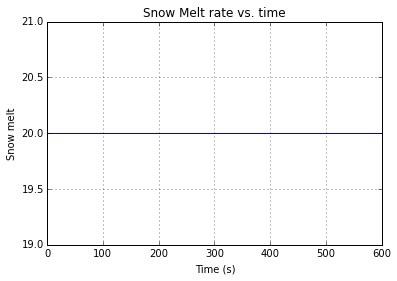

In [16]:
plt.plot(time,T_air,'b'); 
plt.xlabel('Time (s)')
plt.ylabel('Snow melt')
plt.title('Snow Melt rate vs. time')
plt.grid(); plt.show()

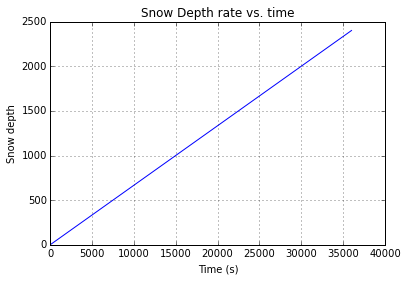

In [7]:
plt.plot(time,h_snow); 
plt.xlabel('Time (s)')
plt.ylabel('Snow depth')
plt.title('Snow Depth rate vs. time')
plt.grid(); plt.show()

In [9]:
h_snow

[array(0.5),
 array(240.49617500000002),
 array(480.49235000000004),
 array(720.488525),
 array(960.4847),
 array(1200.480875),
 array(1440.47705),
 array(1680.473225),
 array(1920.4694),
 array(2160.465575),
 array(2400.46175)]